In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam


In [3]:
sim_df = pd.read_csv("../data/csv/data_intermediaire/sim_ref_data_7.csv")

<AxesSubplot:>

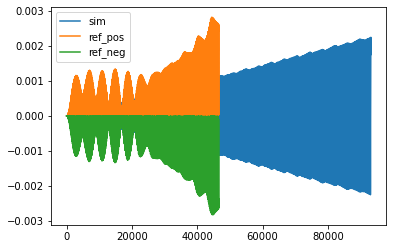

In [4]:
sim_df.plot()

In [5]:
print(sim_df[sim_df.sim >= 0].shape)
print(sim_df[sim_df.sim < 0].shape)

(46474, 3)
(46638, 3)


In [6]:
sim_pos = sim_df[sim_df.sim >= 0].sim.values
ref_pos = sim_df["ref_pos"].dropna().values

In [7]:
print(sim_pos.shape)
print(ref_pos.shape)

(46474,)
(46563,)


In [8]:
ref_pos = ref_pos[:sim_pos.shape[0]]
print(ref_pos.shape)

(46474,)


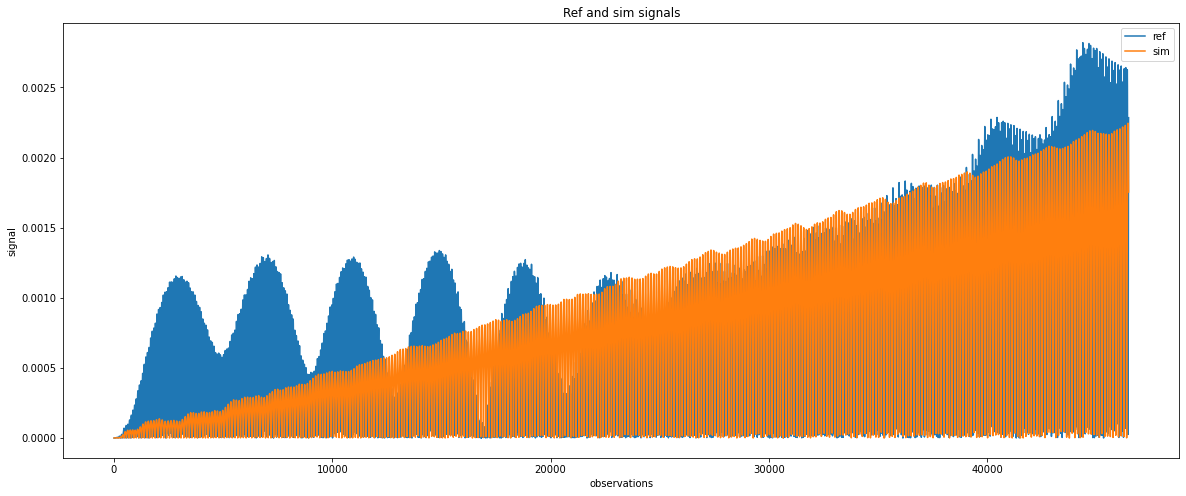

In [9]:
plt.figure(figsize = (20,8))
plt.plot(ref_pos, label = "ref")
plt.plot(sim_pos, label = "sim")
plt.title("Ref and sim signals")
plt.xlabel("observations")
plt.ylabel("signal")
plt.legend()
plt.show()

# Train test split

**80% Train-20% Test**

In [10]:
X_train = sim_pos[:int(len(sim_pos) * 0.8)]
X_test = sim_pos[int(len(sim_pos) * 0.8):]
y_train = ref_pos[:int(len(ref_pos) * 0.8)]
y_test = ref_pos[int(len(ref_pos) * 0.8):]

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37179,)
(9295,)
(37179,)
(9295,)


In [43]:
#XX_Train,yy_train,yy_test,xx_test = train_test_split(sim_pos,ref_pos,test_size = 0.2,random_state = 0, shuffle = False)

In [12]:
def root_mean_squared_error(y_test,y_pred):
    """
    Calcule le root_mean_squared_error (RMSE)
    
    Paramètres
    ----------
    y_test
    y_pred
    
    Return
    ------
    
    RMSE
    

    """
    return np.sqrt(mean_squared_error(y_test,y_pred))

# Entrainement Reseaux de neurones

In [13]:
model = Sequential()
#model.add(Dense(128,input_dim=1, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(30,input_dim=1,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,))
model.add(Activation('sigmoid'))

opt = Adam(learning_rate=0.0001)

model.compile(loss='mean_squared_error', optimizer= opt)

model.fit(X_train,y_train,batch_size = 10, epochs=50,verbose=1)

Epoch 1/50
1633/3718 [============>.................] - ETA: 2s - loss: 0.2005

KeyboardInterrupt: 

In [14]:
y_pred = model.predict(X_test)

In [15]:
#print(model.score(X_test,y_test))
score = model.evaluate(X_test, y_test, batch_size=10)
print(score)
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

930/930 [==============================] - 1s 753us/step - loss: 1.1476e-06
1.147555849456694e-06
1.1475561061950196e-06
0.0010712404520904818
0.0009038671357229238


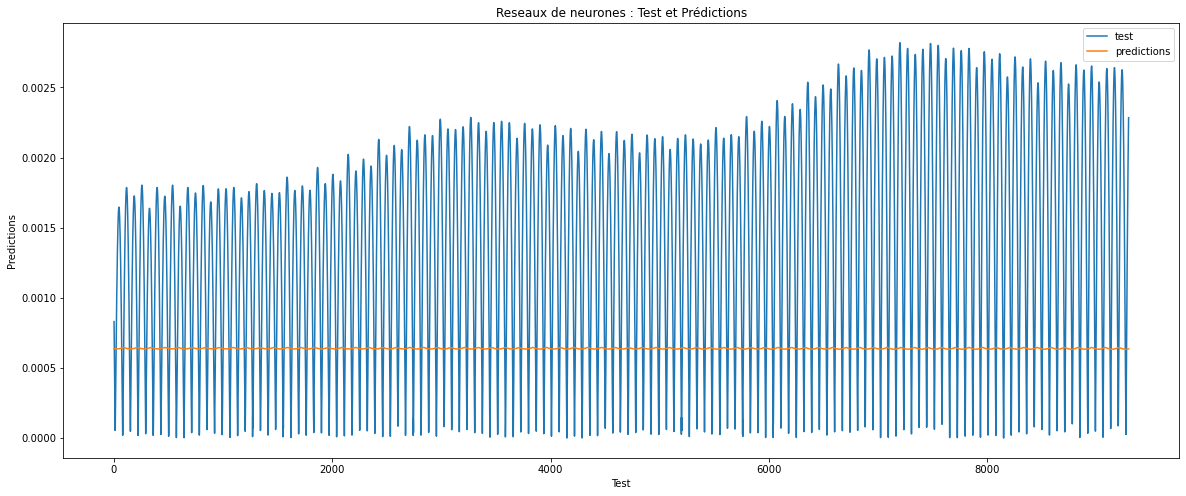

In [16]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "test")
plt.plot(y_pred, label = "predictions")
plt.xlabel("Test")
plt.ylabel("Predictions")
plt.title ("Reseaux de neurones : Test et Prédictions")
plt.legend()
plt.show()